In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hdu1 = fits.open('arcs.fits')
data = hdu1[0].data

spec = np.nanmedian(data,axis=1)

In [3]:
import pandas as pd
df = pd.DataFrame({'counts':spec})
df

,counts
0,5.858733
1,4.407872
2,4.326311
3,4.300486
4,4.611293
...,...
2395,3.048952
2396,3.929400
2397,3.161592
2398,3.926924


In [4]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(spec, height=100)
pk = df.iloc[peaks]

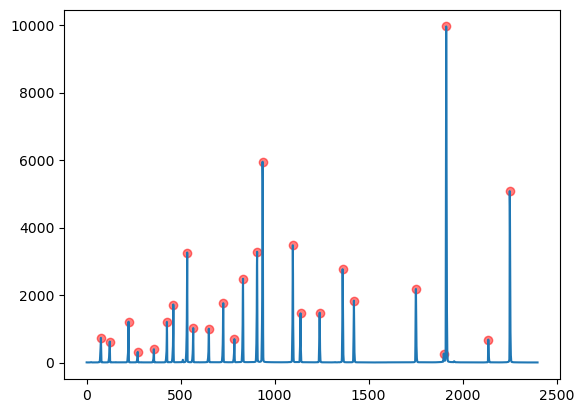

In [5]:
plt.plot(spec)
plt.scatter(peaks,pk.values,c='red',alpha=0.5)

In [6]:
peaks

array([  76,  123,  223,  272,  358,  427,  461,  535,  567,  650,  727,
        786,  832,  907,  936, 1097, 1138, 1240, 1362, 1422, 1752, 1900,
       1913, 2137, 2251])

In [7]:
lambda_peaks = [(6717.04,1422),(6678.2,1362),(6598.95,1240),
                (6532.88,1138),(6506.53,1097),
               (6382.99,832),(6334.40,786),(6304.79,727),(6266.50,650),
               (6217.28,567),(6163.59,535),(6143.60,461),(6096.16,427)]

In [8]:
x_vals = [lambda_peaks[i][1] for i in range(len(lambda_peaks))]
y_vals = [lambda_peaks[i][0] for i in range(len(lambda_peaks))]
print(x_vals)

[1422, 1362, 1240, 1138, 1097, 832, 786, 727, 650, 567, 535, 461, 427]


In [9]:
params = np.polyfit(x_vals,y_vals,deg=1)

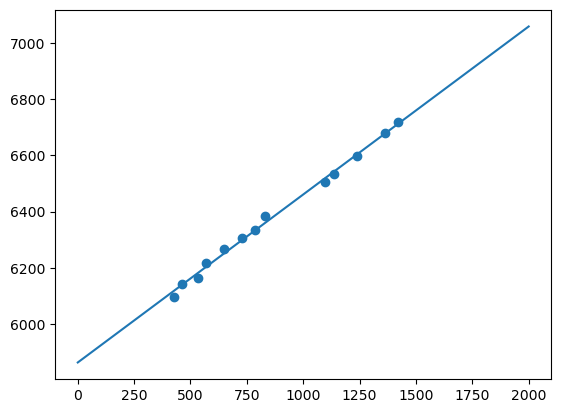

In [10]:
x = np.linspace(0,2000)
y = params[0]*x+params[1]
plt.plot(x,y)
plt.scatter(x_vals,y_vals)

Filename: UGC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     213   (250, 2400)   float64   


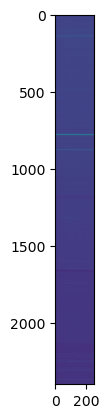

In [11]:
hdu2 = fits.open('UGC.fits')
hdu2.info()
plt.imshow(hdu2[0].data,cmap='viridis')

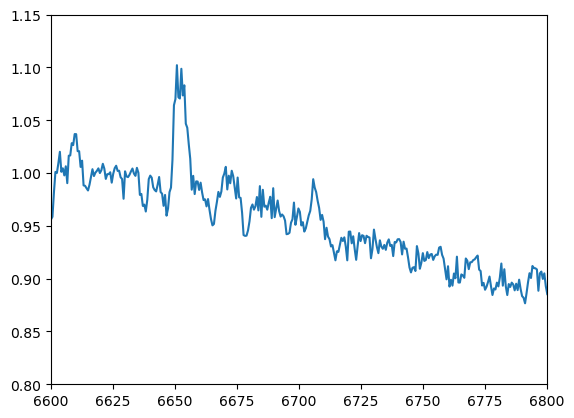

In [12]:
data = hdu2[0].data[:,30:150]
counts = np.nanmedian(data,axis=1)
counts.shape

x = np.arange(0,counts.shape[0])
ind = params[0]*x+params[1]

plt.plot(ind,counts)
plt.xlim(6600,6800)
plt.ylim(0.8,1.15)
plt.savefig('UGC.png')

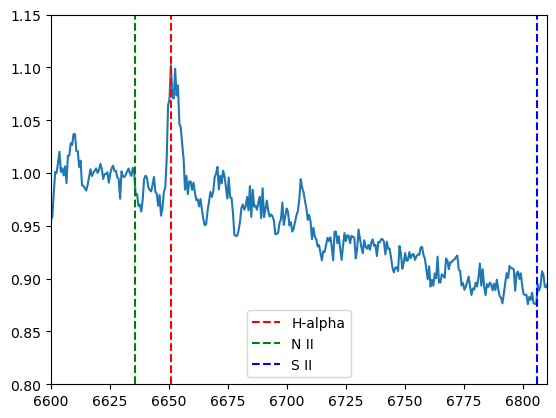

In [13]:
z = 0.0134

# Rest wavelengths (in Angstroms)
lambda_H_alpha_rest = 6562.8
lambda_N_II_rest = 6548
lambda_S_II_rest = 6716

# Calculate the redshifted wavelengths
lambda_H_alpha_observed = lambda_H_alpha_rest * (1 + z)
lambda_N_II_observed = lambda_N_II_rest * (1 + z)
lambda_S_II_observed = lambda_S_II_rest * (1 + z)

# Plot the spectral data
plt.plot(ind, counts)
plt.xlim(6600, 6810)
plt.ylim(0.8, 1.15)

# Add vertical lines for each of the redshifted spectral lines
plt.axvline(x=lambda_H_alpha_observed, color='r', linestyle='--', label='H-alpha')
plt.axvline(x=lambda_N_II_observed, color='g', linestyle='--', label='N II')
plt.axvline(x=lambda_S_II_observed, color='b', linestyle='--', label='S II')

# Adding a legend to distinguish the lines
plt.legend()

plt.savefig('UGC.png',dpi=300)

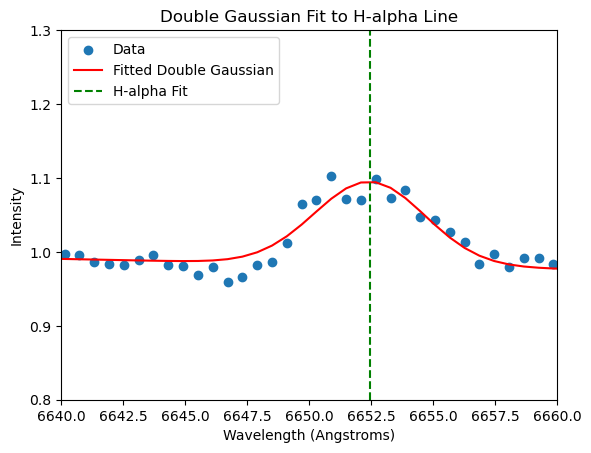

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a double Gaussian function
def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    g1 = amp1 * np.exp(-((x - mean1) ** 2) / (2 * stddev1 ** 2))
    g2 = amp2 * np.exp(-((x - mean2) ** 2) / (2 * stddev2 ** 2))
    return g1 + g2


# Initial guesses:
amp1_guess = 1.1  # peak of the left Gaussian
mean1_guess = 6651 # central wavelength of the left peak
stddev1_guess = 1.0  # width of the left Gaussian

amp2_guess = 1.09  # peak of the right Gaussian
mean2_guess = 6652  # central wavelength of the right peak
stddev2_guess = 1.0  # width of the right Gaussian

# Bundle initial guesses:
p0 = [amp1_guess, mean1_guess, stddev1_guess, amp2_guess, mean2_guess, stddev2_guess]

# Fit the double Gaussian to the data
popt, pcov = curve_fit(double_gaussian, ind, counts, p0=p0)

# Plotting the original data
plt.scatter(ind, counts, label='Data')

# Plotting the fitted double Gaussian
fitted_data = double_gaussian(ind, *popt)
plt.plot(ind, fitted_data, label='Fitted Double Gaussian', color='red')

# Labels, title and legend
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Intensity')
plt.xlim(6640, 6660)
plt.ylim(0.8,1.3)

#Plot the mean of the two Gaussians
plt.axvline(x=popt[1], color='green', linestyle='--', label='H-alpha Fit')


plt.title('Double Gaussian Fit to H-alpha Line')
plt.legend()

# Save and show
plt.savefig('H_alpha_double_fit.png')
plt.show()


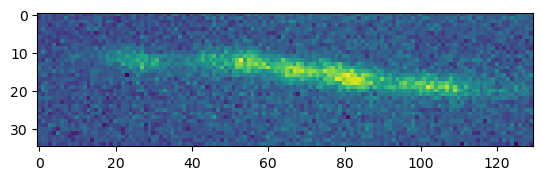

In [15]:
#Making velocity Space plot
my_line = hdu2[0].data[1305:1340,20:150]
plt.imshow(my_line,cmap='viridis')


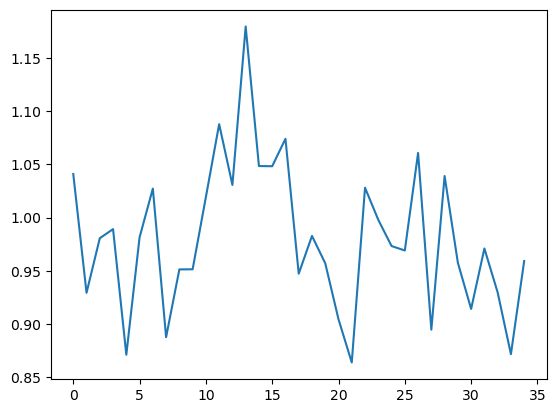

In [16]:
plt.plot(my_line[:,40])


[-21.40871045  55.16555454  24.43876187  17.30654488  36.11601651
   7.93036748  -7.51740942 -37.45417912 -51.87535515 -44.63872525
 -28.03822777]


Text(0.5, 1.0, 'Velocity vs. Pixel')

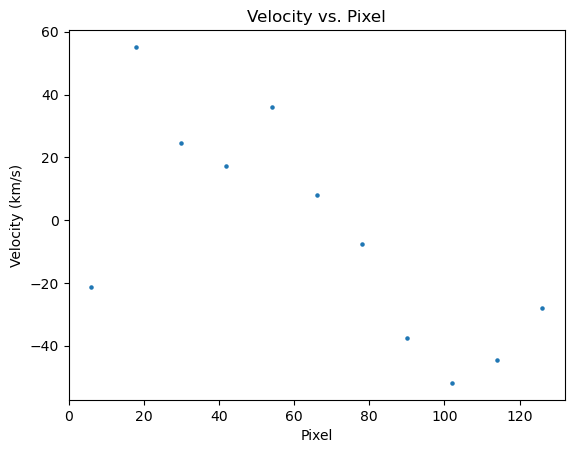

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to model a Gaussian
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Load your image here as a 2D numpy array
# For demonstration purposes, I will create a dummy 2D array
# Please replace this with your actual image loading code
# image = plt.imread('your_image.png') # As an example if you have a png image

image = hdu2[0].data[1305:1340,20:150]
#Storing Wavelegths
central_wavelengths = []

# Define the bin width
bin_width = 12

# Iterate over the columns in steps of 'bin_width'
for col_index in range(0, image.shape[1], bin_width):
    # Bin the columns
    binned_column_data = np.sum(image[:, col_index:col_index + bin_width], axis=1)
    x_data = np.arange(image.shape[0])

    # Use the location of maximum intensity in the binned data as the initial guess for the mean
    max_intensity_index = np.argmax(binned_column_data)
    initial_guess = [binned_column_data[max_intensity_index], max_intensity_index, 10]  # amplitude, mean, stddev

    try:
        # Fit a Gaussian to the binned data
        popt, _ = curve_fit(gaussian, x_data, binned_column_data, p0=initial_guess)
        # popt contains the fitted parameters: amplitude, mean, stddev

        # Save the central wavelength (mean of the Gaussian)
        central_wavelengths.append((popt[1], col_index + bin_width // 2))  # Save mean and center column of the bin
    except RuntimeError:
        print(f"Could not fit a Gaussian to binned columns {col_index} to {col_index + bin_width}.")
        central_wavelengths.append((np.nan, col_index + bin_width // 2)) 

# Convert the list of central wavelengths to a numpy array
central_wavelengths = np.array(central_wavelengths)


x_values, y_values = central_wavelengths[:, 1], params[0]*(1305+central_wavelengths[:, 0]) + params[1]



# Convert the central wavelengths to velocities
c = 3e5  # km/s
z = 0.0134
velocities = c * ((y_values / 6512.8) - 1 - z)

cen_vel = c * ((6652.8 / 6512.8) - 1 - z)

velocities = cen_vel - velocities
print(velocities)
x = np.arange(0,velocities.shape[0])
# Plot the velocities
plt.scatter(x_values,velocities,s=5)

# Labels and title
plt.xlabel('Pixel')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity vs. Pixel')

# plt.ylim(-200,200)

# plt.axhline(y=0, color='red', linestyle='--', label='x-axis')



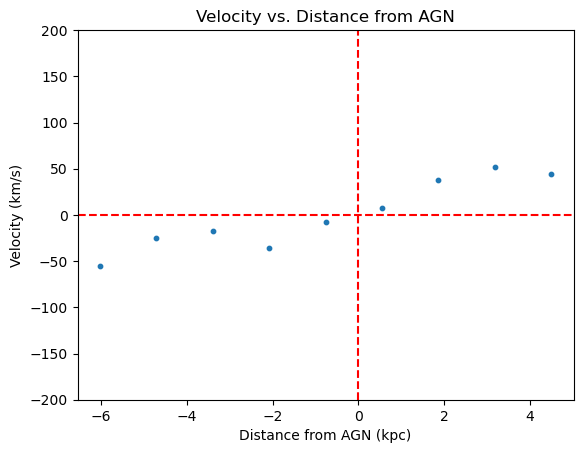

In [18]:

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Constants
pixel_scale = 0.4  # arcseconds per pixel
c = 3e5  # Speed of light in km/s
z = 0.0134  # Redshift
reference_wavelength = 6512.8  # Reference wavelength in Angstroms

# Cosmological parameters (Assuming WMAP9 results here, change if needed)
H0 = 70 * (u.km / (u.s * u.Mpc))  # Hubble constant
Omega_m = 0.3  # Matter density
cosmo = FlatLambdaCDM(H0=H0, Om0=Omega_m)

# Calculate the scale factor to convert arcsecond to kpc at the given redshift
scale_kpc_arcsec = cosmo.arcsec_per_kpc_proper(z).value  # kpc/arcsec

# Calculate velocities and the central velocity
velocities = c * ((y_values[1:-1] / reference_wavelength) - 1 - z)
cen_vel = c * ((6652.8 / 6512.8) - 1 - z)
velocities -= cen_vel

# Find the pixel index of the nucleus (where velocity is zero)
nucleus_index = np.nanargmin(np.abs(velocities))

# Convert pixel offsets to kpc relative to the nucleus
arcsec_offsets = (central_wavelengths[1:-1, 1] - 73) * pixel_scale
kpc_offsets = arcsec_offsets / scale_kpc_arcsec  # Conversion to kpc

# Plot the velocities as a function of distance from the AGN in kpc
plt.scatter(kpc_offsets, velocities, s=10, label='Measured Velocities')

# Fit a smooth curve (e.g., a polynomial) to the data
degree = 5
coefficients = np.polyfit(kpc_offsets, velocities, degree)
polynomial = np.poly1d(coefficients)
x_smooth = np.linspace(kpc_offsets.min(), kpc_offsets.max(), 500)
y_smooth = polynomial(x_smooth)

# Plot the smooth curve
#plt.plot(x_smooth, y_smooth, color='blue', label='Smooth Curve Fit')

# Labels and title
plt.xlabel('Distance from AGN (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity vs. Distance from AGN')

# Set y-limits to focus on the region of interest
#plt.ylim(-200, 200)

# Draw a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', label='Center Velocity')
plt.axvline(x=0, color='red', linestyle='--', label='Center')

# Show legend
#plt.legend()
plt.ylim(-200,200)

# Display the plot
plt.show()
